In [90]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

figsize = (12, 6)

def summarise_datasets(all_data, names):
    means = []
    stds = []
    indexes = []

    for name in names:
        means.append(all_data[name].mean())
        stds.append(all_data[name].std())
        indexes.append(name)

    df_mean = pd.DataFrame(means, index = indexes)
    df_std = pd.DataFrame(stds, index = indexes)

    return df_mean, df_std

def do_ttest(all_data, label1, label2):
    """ Wrapper around scipy ttest_ind, using Welch's t-test"""
    label1_data = all_data[label1]
    label2_data = all_data[label2]

    cat1 = label1_data["Reproj."]
    cat2 = label2_data["Reproj."]
    reproj = ttest_ind(cat1, cat2, equal_var=False)
          
    cat1 = label1_data["Recon."]
    cat2 = label2_data["Recon."]
    recon = ttest_ind(cat1, cat2, equal_var=False)
    
    cat1 = label1_data["Tracked Reproj."]
    cat2 = label2_data["Tracked Reproj."]
    tracked_reproj = ttest_ind(cat1, cat2, equal_var=False)
    
    cat1 = label1_data["Tracked Recon."]
    cat2 = label2_data["Tracked Recon."]
    tracked_recon = ttest_ind(cat1, cat2, equal_var=False)
    
    print(f"Reprojection p-value: {reproj.pvalue}")
    print(f"Reconstruction p-value: {recon.pvalue}")
    print(f"Tracked Reprojection p-value: {tracked_reproj.pvalue}")
    print(f"Tracked Reconstruction p-value: {tracked_recon.pvalue}")

    return reproj, recon, tracked_reproj, tracked_recon

# Load in calibration results from .csv files

In [91]:
calib_data = {}

path = './results'
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

for csv in csv_files:
    file = os.path.join(path, csv)
    data_name = csv.split('.')[0]
    calib_data[data_name] = pd.read_csv(file, index_col = 0)

# Summary statistics for rig & freehand calibration

Mean Values


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,0.944777,1.363656,1.073905,1.365135,1.319827,14.926883
dots_rig,1.199550,0.925462,1.349359,0.933968,0.912419,10.119291
charuco_freehand,1.343829,2.232005,4.242161,3.367961,1.735755,22.619610


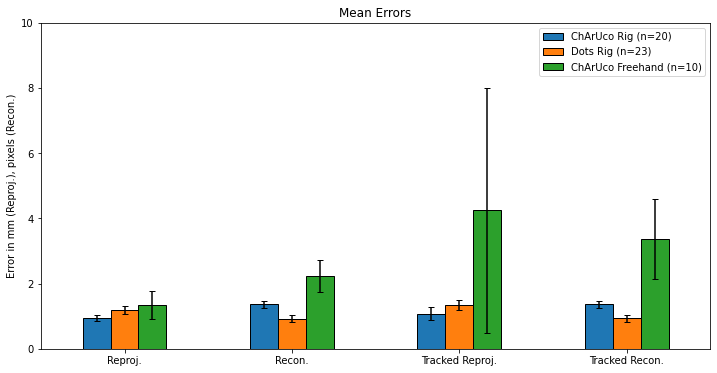

In [157]:
means, stds = summarise_datasets(calib_data, ["charuco_rig", "dots_rig", "charuco_freehand"])
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

means[columns_to_plot].transpose().plot.bar(title="Mean Errors",
                                            ax=ax1,
                                            yerr=stds.transpose(),
                                            ecolor='black',
                                            capsize=3,
                                            rot=0,
                                            legend=None,
                                            ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                           edgecolor=["black"])
ax1.set_ylim(0, 10)

n_charuco_rig = len(calib_data["charuco_rig"])
n_dots_rig = len(calib_data["dots_rig"])
n_charuco_freehand = len(calib_data["charuco_freehand"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})", f"ChArUco Freehand (n={n_charuco_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])
L.get_texts()[2].set_text(legend[2])

plt.savefig('plots/charuco_vs_dots_vs_freehand_mean.png', dpi=600)

print("Mean Values")
means


# Freehand vs Rig (ChArUco)

Reprojection p-value: 0.015109286930403856
Reconstruction p-value: 0.00035235008517515884
Tracked Reprojection p-value: 0.025617091778881315
Tracked Reconstruction p-value: 0.0005502196694170684


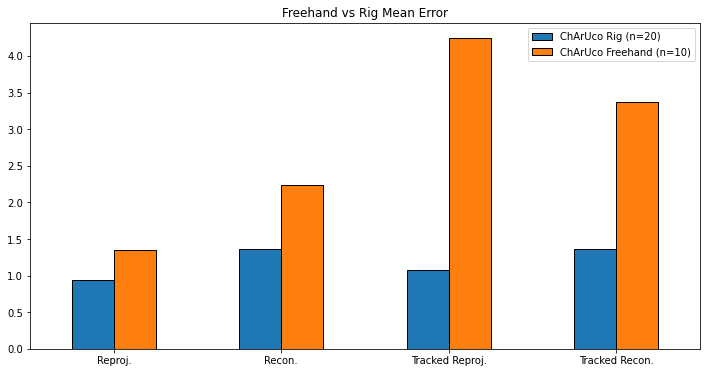

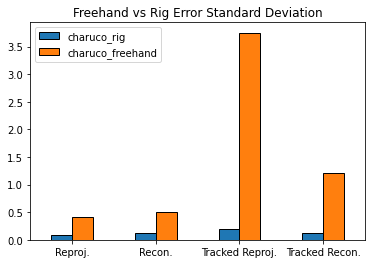

In [158]:
freehand_vs_rig_mean, freehand_vs_rig_std = summarise_datasets(calib_data, ["charuco_rig", "charuco_freehand"])
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

freehand_vs_rig_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Freehand vs Rig Mean Error", rot=0, edgecolor=["black"])
freehand_vs_rig_std[columns_to_plot].transpose().plot.bar(title="Freehand vs Rig Error Standard Deviation", rot=0, edgecolor=["black"])

n_charuco_rig = len(calib_data["charuco_rig"])
n_charuco_freehand = len(calib_data["charuco_freehand"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"ChArUco Freehand (n={n_charuco_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/charuco_fh_vs_rig_mean.png', dpi=600)

t_test_vals = do_ttest(calib_data, "charuco_rig", "charuco_freehand")


# Charuco vs Dots

Reprojection p-value: 7.519885458403013e-10
Reconstruction p-value: 7.697003069787402e-16
Tracked Reprojection p-value: 1.1606624643802439e-05
Tracked Reconstruction p-value: 1.4904627563792652e-15


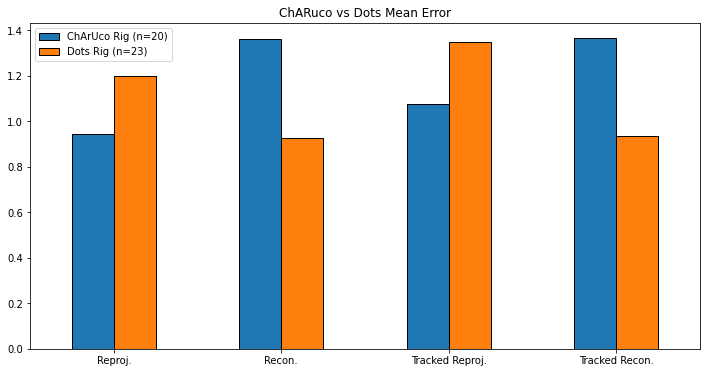

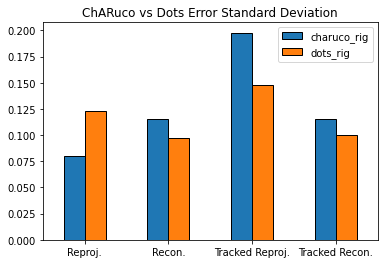

In [159]:
charuco_vs_dots_mean, charuco_vs_dots_std = summarise_datasets(calib_data, ["charuco_rig", "dots_rig"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

charuco_vs_dots_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="ChARuco vs Dots Mean Error", rot=0, edgecolor=["black"])
charuco_vs_dots_std[columns_to_plot].transpose().plot.bar(title="ChARuco vs Dots Error Standard Deviation", rot=0, edgecolor=["black"])

n_charuco_rig = len(calib_data["charuco_rig"])
n_dots_rig = len(calib_data["dots_rig"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/charuco_vs_dots_mean.png', dpi=600)

# calib_data["charuco_rig"][columns_to_plot].plot(title="Charuco Rig")
# calib_data["dots_rig"][columns_to_plot].plot(title="Dots Rig")

results = do_ttest(calib_data, "dots_rig", "charuco_rig")

# Iterative vs. Non-iterative Charuco

In [95]:
iterative_vs_non_iterative_mean, iterative_vs_non_iterative_std = summarise_datasets(calib_data, ["charuco_rig", "charuco_rig-iterative"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1, 1, 1)

iterative_vs_non_iterative_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Iterative vs  Non Iterative Mean Error", rot=0)
iterative_vs_non_iterative_std[columns_to_plot].transpose().plot.bar(title="Iterative vs  Non Iterative Standard Deviation", rot=0)

n_rig = len(calib_data["charuco_rig"])
n_iterative = len(calib_data["charuco_rig-iterative"])

L = ax1.legend()
legend = [f"Charuco Rig (n={n_rig})", f"Charuco Rig Iterative (n={n_iterative})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/charuco_iterative_vs_noniterative_mean.png', dpi=600)

do_ttest(calib_data, "charuco_rig-iterative", "charuco_rig")
iterative_vs_non_iterative_mean

KeyError: 'charuco_rig-iterative'

# Iterative  vs non-iterative, dots

In [96]:
iterative_vs_non_iterative_mean, iterative_vs_non_iterative_std = summarise_datasets(calib_data, ["dots_rig", "dots_rig-iterative"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1, 1, 1)

iterative_vs_non_iterative_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Iterative vs  Non Iterative Mean Error", rot=0)
iterative_vs_non_iterative_std[columns_to_plot].transpose().plot.bar(title="Iterative vs  Non Iterative Standard Deviation", rot=0)


n_dots_rig = len(calib_data["dots_rig"])
n_dots_iterative = len(calib_data["dots_rig-iterative"])

L = ax1.legend()
legend = [f"Dots Rig (n={n_dots_rig})", f"Dots Rig Iterative (n={n_dots_iterative})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/dots_iterative_vs_noniterative_mean.png', dpi=600)

do_ttest(calib_data, "charuco_rig-iterative", "charuco_rig")
iterative_vs_non_iterative_mean

KeyError: 'dots_rig-iterative'

# Iterative vs non-iterative freehand

In [97]:
iterative_vs_non_iterative_mean, iterative_vs_non_iterative_std = summarise_datasets(calib_data, ["charuco_freehand", "charuco_freehand-iterative"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1, 1, 1)

iterative_vs_non_iterative_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Iterative vs  Non Iterative Mean Error", rot=0)
iterative_vs_non_iterative_std[columns_to_plot].transpose().plot.bar(title="Iterative vs  Non Iterative Standard Deviation", rot=0)

n_rig = len(calib_data["charuco_freehand"])
n_iterative = len(calib_data["charuco_freehand-iterative"])

L = ax1.legend()
legend = [f"Charuco Freehand (n={n_rig})", f"Charuco Freehand Iterative (n={n_iterative})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/charuco_fh_iterative_vs_noniterative_mean.png', dpi=600)

do_ttest(calib_data, "charuco_freehand-iterative", "charuco_freehand")
iterative_vs_non_iterative_mean

KeyError: 'charuco_freehand-iterative'

# Leave one out/precalibration results
'Standard' approaches to calibration involve calbirating and evaluating on the same datasets, which will return favourable results, when compared to evaluating on a different set of data.

Instead iterate through all datasets and use 1 for calibration, and then evaluate on the rest.

This will results in n sets of results, where n is the total number of calibration data sets collected.

In [98]:
def collate_results(folder: str, threshold: int = 100) -> pd.DataFrame :
    """ Combine results from all csv files in a folder into a single dataframe
    Remove data that is above a certain threshold, which is likely to be due to an error in calbration"""
    print(f"Processing {folder}")
    csv_files = [f for f in os.listdir(folder) if f.endswith('.csv')]
    data = []

    for csv in csv_files:
        file = os.path.join(folder, csv)
        data.append(pd.read_csv(file, index_col=0))
    
    all_data = data[0]
    for i in range(1, len(csv_files)):
        all_data = all_data.append(data[i])
    
    # Clean the data
    good_reproj_idx = all_data["Reproj."] < threshold
    all_data = all_data[good_reproj_idx]

    good_track_reproj_idx = all_data["Tracked Reproj."] < threshold
    all_data = all_data[good_track_reproj_idx]

    good_recon_idx = all_data["Recon."] < threshold
    all_data = all_data[good_recon_idx]

    good_track_recon_idx = all_data["Tracked Recon."] < threshold
    all_data = all_data[good_track_recon_idx]

    return all_data

In [99]:
dots_folder = 'results/precalib/dots_rig'
charuco_folder = 'results/precalib/charuco_rig'
charuco_freehand_folder = 'results/precalib/charuco_freehand'

precalib_data = {}
threshold = 1000

precalib_data["dots_rig"] = collate_results(dots_folder, threshold=threshold)
precalib_data["charuco_rig"] = collate_results(charuco_folder, threshold=threshold)
precalib_data["charuco_freehand"] = collate_results(charuco_freehand_folder, threshold=threshold)


Processing results/precalib/dots_rig
Processing results/precalib/charuco_rig
Processing results/precalib/charuco_freehand


# Summary Statistics

Mean Values


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,0.944777,1.363656,1.073905,1.365135,1.319827,14.926883
dots_rig,1.199550,0.925462,1.349359,0.933968,0.912419,10.119291
charuco_freehand,1.343829,2.232005,4.242161,3.367961,1.735755,22.619610


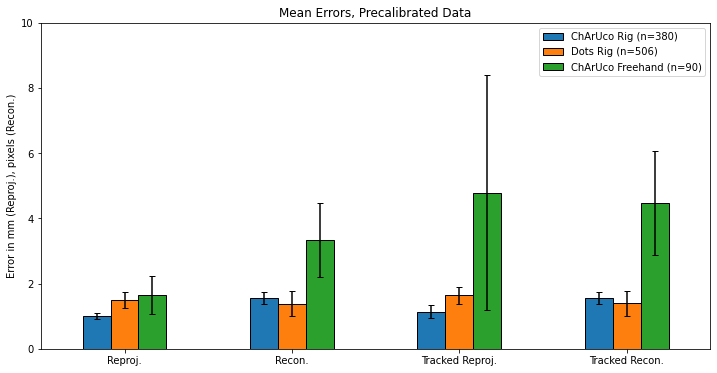

In [160]:
precalib_means, precalib_stds = summarise_datasets(precalib_data, ["charuco_rig", "dots_rig", "charuco_freehand"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

precalib_means[columns_to_plot].transpose().plot.bar(title="Mean Errors, Precalibrated Data",
                                                     ax=ax1,
                                                     yerr=precalib_stds.transpose(),
                                                     ecolor='black',
                                                     capsize=3,
                                                     rot=0,
                                                     legend=None,
                                                     ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                                    edgecolor=["black"])
ax1.set_ylim(0, 10)

n_charuco_rig = len(precalib_data["charuco_rig"])
n_dots_rig = len(precalib_data["dots_rig"])
n_charuco_freehand = len(precalib_data["charuco_freehand"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})", f"ChArUco Freehand (n={n_charuco_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])
L.get_texts()[2].set_text(legend[2])


plt.savefig('plots/_precalib_charuco_vs_dots_vs_freehand_mean.png', dpi=600)

print("Mean Values")
means

# Compare precalib and not precalib

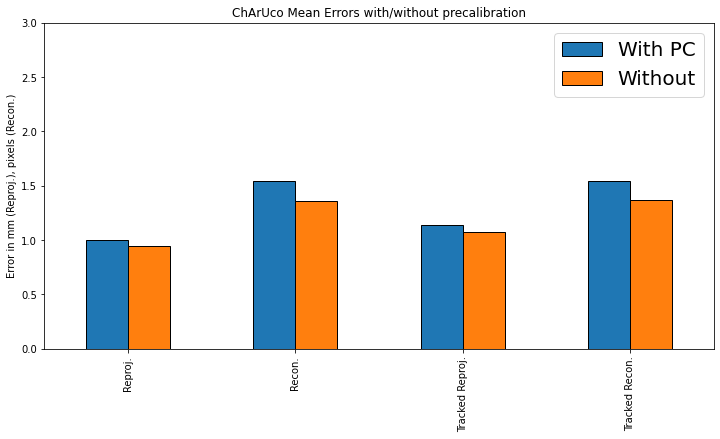

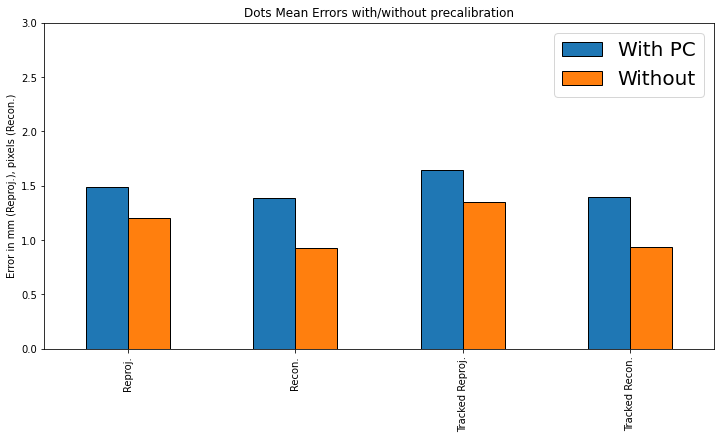

In [156]:
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]
labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

charuco = pd.DataFrame()
dots = pd.DataFrame()

charuco["With_precalib"] = precalib_means.transpose()["charuco_rig"]
charuco["Without_precalib"] = means.transpose()["charuco_rig"]
dots["With_precalib"] = precalib_means.transpose()["dots_rig"]
dots["Without_precalib"] = means.transpose()["dots_rig"]
calib_vs_precalib = calib_vs_precalib.transpose()

charuco = charuco.transpose()
dots = dots.transpose()

# Plot Charuco
fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

charuco[columns_to_plot].transpose().plot.bar(title="ChArUco Mean Errors with/without precalibration",
                                                        ax=ax1,
                                                        legend=None,
                                                        ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                                         edgecolor=["black"])
ax1.set_ylim(0, 3)

L = ax1.legend(prop={'size': 20})
legend = [f"With PC", f"Without"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])


plt.savefig('plots/charuco_precalib_vs_no_precalib.png', dpi=600)

# Plot dots
fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

dots[columns_to_plot].transpose().plot.bar(title="Dots Mean Errors with/without precalibration",
                                                        ax=ax1,
                                                        legend=None,
                                                        ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                          edgecolor=["black"])
ax1.set_ylim(0, 3)

L = ax1.legend(prop={'size': 20})
legend = [f"With PC", f"Without"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])


plt.savefig('plots/Dots_precalib_vs_no_precalib.png', dpi=600)

# Freehand vs rig

Reprojection p-value: 4.3921859986773414e-17
Reconstruction p-value: 2.689306349543687e-26
Tracked Reprojection p-value: 1.968484011438672e-15
Tracked Reconstruction p-value: 2.5036312775211104e-30


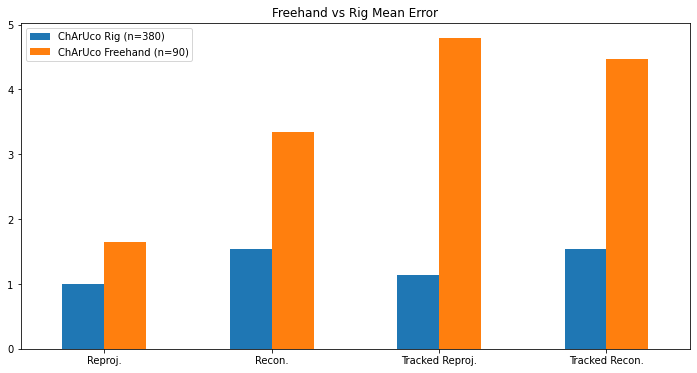

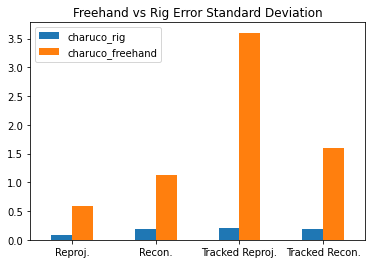

In [65]:
precalib_freehand_vs_rig_mean, precalib_freehand_vs_rig_std = summarise_datasets(precalib_data, ["charuco_rig", "charuco_freehand"])
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

precalib_freehand_vs_rig_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Freehand vs Rig Mean Error", rot=0)
precalib_freehand_vs_rig_std[columns_to_plot].transpose().plot.bar(title="Freehand vs Rig Error Standard Deviation", rot=0)

n_charuco_rig = len(precalib_data["charuco_rig"])
n_charuco_freehand = len(precalib_data["charuco_freehand"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"ChArUco Freehand (n={n_charuco_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/precalib_charuco_fh_vs_rig_mean.png', dpi=600)

t_test_vals = do_ttest(calib_data, "charuco_rig", "charuco_freehand")

# Charuco vs Dots

Reprojection p-value: 1.2601523637985995e-184
Reconstruction p-value: 2.0422375716016668e-15
Tracked Reprojection p-value: 3.2064918224059746e-154
Tracked Reconstruction p-value: 3.0705062000544537e-14


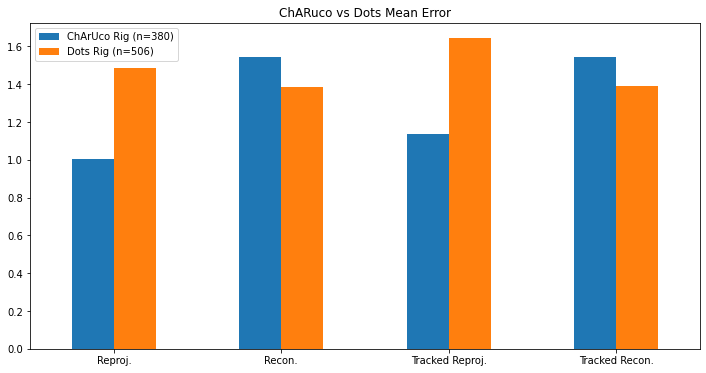

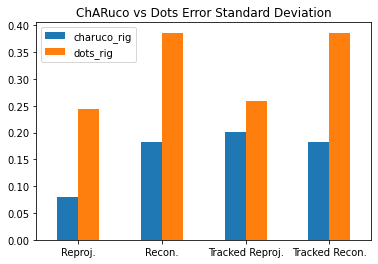

In [66]:
precalib_charuco_vs_dots_mean, precalib_charuco_vs_dots_std = summarise_datasets(precalib_data, ["charuco_rig", "dots_rig"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

precalib_charuco_vs_dots_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="ChARuco vs Dots Mean Error", rot=0)
precalib_charuco_vs_dots_std[columns_to_plot].transpose().plot.bar(title="ChARuco vs Dots Error Standard Deviation", rot=0)

n_charuco_rig = len(precalib_data["charuco_rig"])
n_dots_rig = len(precalib_data["dots_rig"])

L = ax1.legend()
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/precalib_charuco_vs_dots_mean.png', dpi=600)

# calib_data["charuco_rig"][columns_to_plot].plot(title="Charuco Rig")
# calib_data["dots_rig"][columns_to_plot].plot(title="Dots Rig")

results = do_ttest(calib_data, "dots_rig", "charuco_rig")